<a href="https://colab.research.google.com/github/rizha12/cohort_analysis/blob/main/Salinan_dari_Hubungan_Pengalaman_terhadap_Gaji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Linear Regression in python
Dalam contoh ini kita memilki dua kolom pengalaman tahun dan gaji. dimana kita mau melihat antara:


*   Gaji (Y) -> dalam dollar/tahun
*   Pengalaman (X) -> (dalam tahun)




**Step 1: import package yang dibutuhkan**

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

**Step 2: Memasukkan data**

In [ ]:
# Get dataset
df_sal = pd.read_csv('https://raw.githubusercontent.com/brainspopper/dataset/main/Salary_Data.csv')
df_sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


**Step 3: Data analysis**

In [ ]:
# Describe data
df_sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Di sini kita dapat melihat gaji berkisar antara 37731 sampai 122391 dan median 65237.

<ipython-input-4-09fc475b55e6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sal['Salary'])


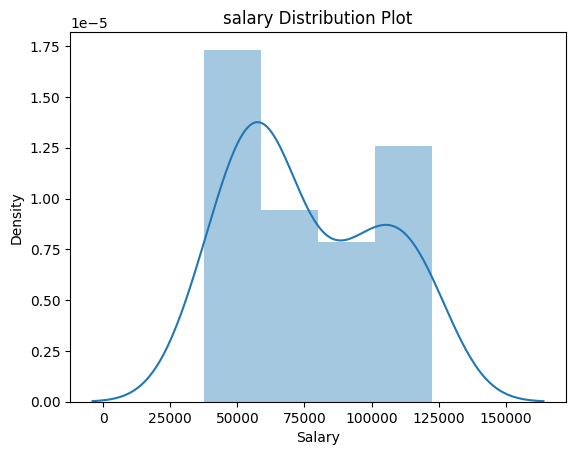

In [ ]:
# data distribution
plt.title('salary Distribution Plot')
sns.distplot(df_sal['Salary'])
plt.show()

Distribution plot menunjukkan variasi sebaran data. ini mewakili data dengan menggabungkan garis dengan histroga.

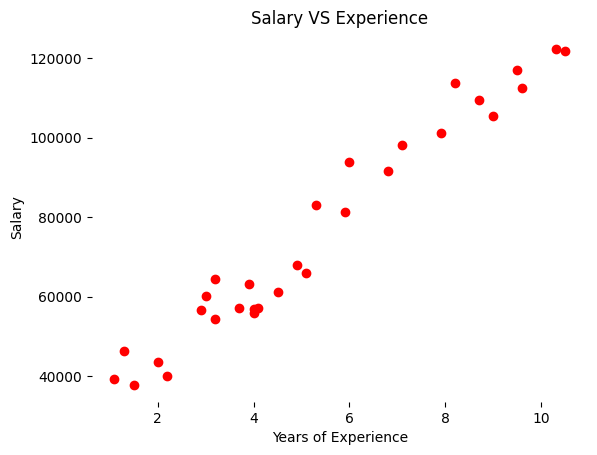

In [ ]:
# relationship between Salary and Experience
plt.scatter(df_sal['YearsExperience'], df_sal['Salary'], color = 'red')
plt.title('Salary VS Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.box(False)
plt.show()

data bervariansi secara linier. Artinya seseorang menerima gaji lebih banyak seiring bertambahnya pengalaman

***Step 4: Membagi dataset menjadi dependent / independent variables***

In [ ]:
# splitting variables
x = df_sal.iloc[:, :1]
y = df_sal.iloc[:, 1:]

***Step 5: membuat model***

In [ ]:
# regression model
regressor = LinearRegression()
regressor.fit(x, y)

LinearRegression()

In [ ]:
# Regressor coeffocoents and intercept
print(f'Coefficients: {regressor.coef_}')
print(f'Intercept : {regressor.intercept_}')


Coefficients: [[9449.96232146]]
Intercept : [25792.20019867]


Persamaan yang didapat

Y = 25792.20019867 + (X)*9449.96232146

  
***Step 6: Mengevaluasi Model***

R^2

In [ ]:
# Calculate R-squared of regression model

r_squared = regressor.score(x, y)

r_squared

0.9569566641435086

Mean Square Error

In [ ]:
y_pred = regressor.predict(x)
y_pred

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y, y_pred, squared=False)
rmse

5592.043608760661

Rata-rata galat antara 1 dengan yang lain itu adalah 5592 dollar. artinya dengan orang yang memiliki pengalaman kerja yang sama, bisa memiliki rentang perbedaan gaji 5592 dollar.

 atau jika ada orang yang memiliki pengalaman satu tahun gajinya bisa lebih tinggi atau lebih rendah 5592 dengan orang yang memiliki pengalaman yang sama

***Step 7: Pengecekan Pemenuhan Syarat***


Homoskedastisitas
Goldfeld Quandt Test
1. H0 -> Null Hypothesis: Error terms are homoscedastic
2. H1 -> Alt. Hypothesis: Error terms are heteroscedastic


In [ ]:
residuals = y.values-y_pred

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, x)
lzip(name, test)

[('F statistic', 1.080730670761193), ('p-value', 0.44327931035663354)]

Normality Residual

<ipython-input-24-8727b6d77391>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(residuals, kde=True)


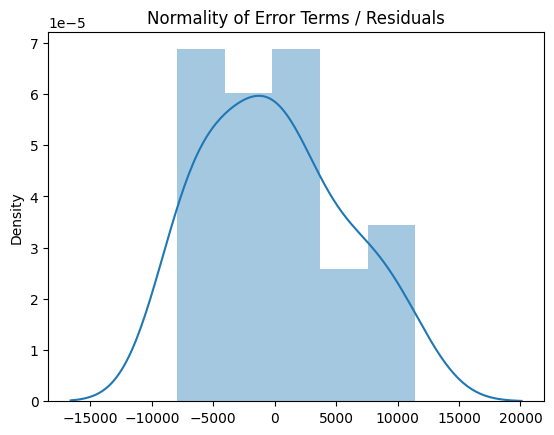

In [ ]:
p = sns.distplot(residuals, kde=True)
p = plt.title('Normality of Error Terms / Residuals')


berdistibusi normal, karena mendekati dari grafik distribusi normal itu sendiri

Independesni residual (No Autocorrelation)

Ljungbox test:

1. H0 -> Null Hypothesis: Autocorrelation is absent
2. H1 -> Alt. Hypothesis: Autocorellation is present.


In [ ]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(residuals, lags= [5], return_df= True)

,lb_stat,lb_pvalue
5,7.190889,0.206826


p value = dengan sig 0.5% tidak memiliki hubungan satu dengan yang lain